In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn. preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras. optimizers import Adam
from keras. models import load_model
from keras. layers import LSTM
from keras. utils import plot_model

In [ ]:
#Get the Dataset
data=pd.read_csv("/content/LT.NS (1).csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-01,40.111111,40.724445,40.111111,40.435555,30.613447,3709080.0
2002-07-02,40.555553,40.933334,40.444443,40.533333,30.687473,2500024.0
2002-07-03,40.688889,40.755554,40.022221,40.080002,30.344254,1910772.0
2002-07-04,40.244446,40.377777,39.835556,39.924442,30.226488,1515924.0
2002-07-05,39.799999,40.222221,39.799999,40.022221,30.300518,1038928.0


In [ ]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ', data. shape)
print('Null Value Present: ', data.isnull().values.any())


Dataframe Shape:  (5292, 6)
Null Value Present:  True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5263 entries, 2002-07-01 to 2023-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5263 non-null   float64
 1   High       5263 non-null   float64
 2   Low        5263 non-null   float64
 3   Close      5263 non-null   float64
 4   Adj Close  5263 non-null   float64
 5   Volume     5263 non-null   float64
dtypes: float64(6)
memory usage: 287.8 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5.263000e+03
mean,846.743922,857.104152,835.539506,845.899884,760.385434,3.535468e+06
std,577.354448,582.577926,572.240506,577.210096,571.806772,2.577948e+06
min,34.777779,35.266666,16.666666,34.955555,26.464579,0.000000e+00
25%,377.316665,384.405563,370.288894,377.766662,303.742203,1.923804e+06
50%,754.666687,764.311096,740.666687,751.733337,626.397705,2.807122e+06
75%,1195.150025,1209.883362,1178.816650,1193.616638,1062.480713,4.349304e+06
max,3064.100098,3077.449951,3005.250000,3073.250000,3073.250000,4.367629e+07


In [ ]:
data.isnull().sum()

Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(5285, 6)

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.shape

(5263, 6)

<Axes: xlabel='Date'>

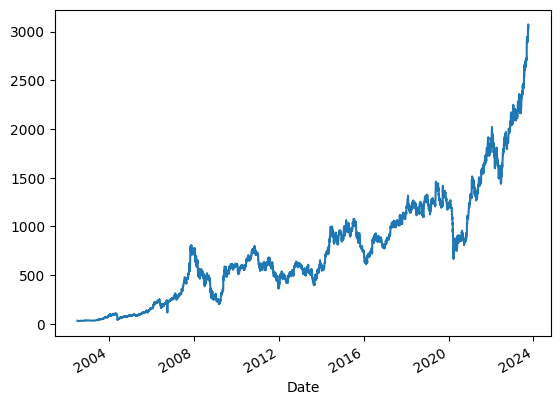

In [ ]:
#Plot the True Adj Close Value
data['Adj Close'].plot()

In [ ]:
#Set Target Variable
output_var = pd.DataFrame(data['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=data.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2002-07-01,0.001761,0.001794,0.007845,0.084922
2002-07-02,0.001907,0.001863,0.007956,0.057240
2002-07-03,0.001951,0.001804,0.007815,0.043748
2002-07-04,0.001805,0.001680,0.007752,0.034708
2002-07-05,0.001658,0.001629,0.007741,0.023787


In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
# Implement learning rate scheduling
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
#Model Training
history=model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
599/599 [==============================] - 11s 6ms/step - loss: 11030.8359
Epoch 2/100
599/599 [==============================] - 5s 8ms/step - loss: 5786.6172
Epoch 3/100
599/599 [==============================] - 4s 6ms/step - loss: 2111.0337
Epoch 4/100
599/599 [==============================] - 4s 6ms/step - loss: 928.8117
Epoch 5/100
599/599 [==============================] - 5s 8ms/step - loss: 612.9839
Epoch 6/100
599/599 [==============================] - 4s 6ms/step - loss: 460.4013
Epoch 7/100
599/599 [==============================] - 4s 6ms/step - loss: 385.7246
Epoch 8/100
599/599 [==============================] - 4s 7ms/step - loss: 342.1649
Epoch 9/100
599/599 [==============================] - 4s 7ms/step - loss: 312.6517
Epoch 10/100
599/599 [==============================] - 4s 6ms/step - loss: 291.7578
Epoch 11/100
599/599 [==============================] - 4s 7ms/step - loss: 277.5642
Epoch 12/100
599/599 [==============================] - 6s 10ms/step 

In [ ]:
#LSTM Prediction
y_pred= model.predict(X_test)

15/15 [==============================] - 1s 3ms/step


In [ ]:
# Assuming you have already defined X_test and y_test

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f'Test Loss (MSE): {test_loss:.4f}')


Test Loss (MSE): 946.3619


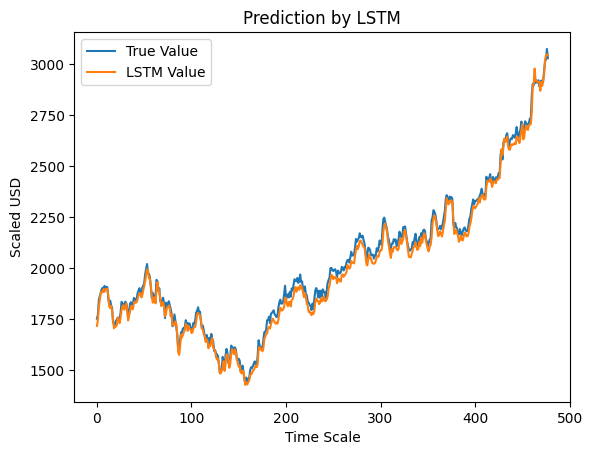

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()